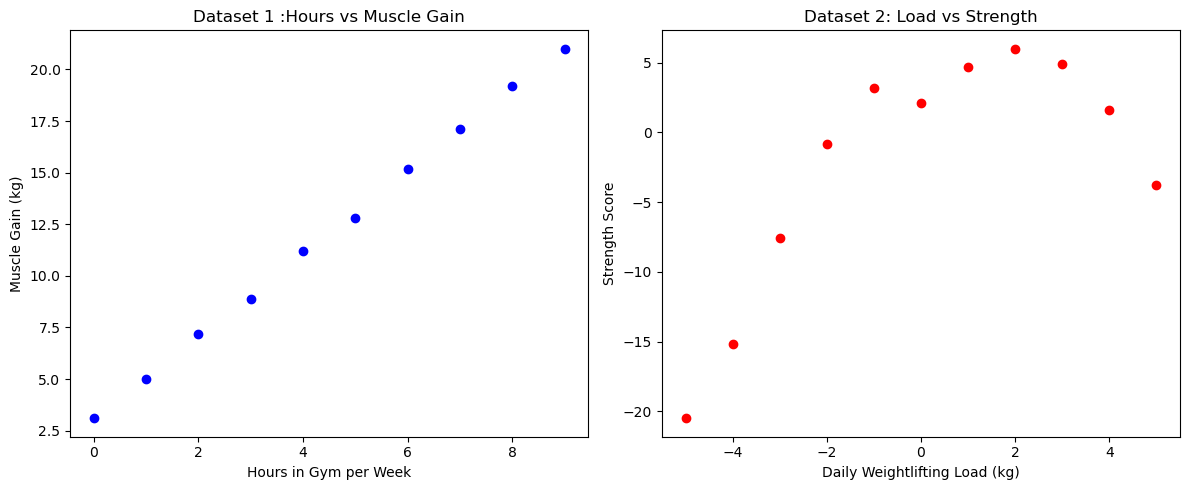

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#hours spent in the gym per week(X) and muscle mass gain in kg (Y)
x1 = np.array([0,1,2,3,4,5,6,7,8,9])
y1 = np.array([3.1,5.0,7.2,8.9,11.2,12.8,15.2,17.1,19.2,21.0])
#daily weightlifting load in kg (X) and muscle strength score (Y)
x2 = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y2 = np.array([-20.5,-15.2,-7.6,-0.8,3.2,2.1,4.7,6.0,4.9,1.6,-3.8])

plt.figure(figsize=(12,5))
# Dataset 1
plt.subplot(1,2,1)
plt.scatter(x1,y1,color="blue")
plt.title("Dataset 1 :Hours vs Muscle Gain")
plt.xlabel("Hours in Gym per Week")
plt.ylabel("Muscle Gain (kg)")

# Dataset 2
plt.subplot(1,2,2)
plt.scatter(x2, y2, color="red")
plt.title("Dataset 2: Load vs Strength")
plt.xlabel("Daily Weightlifting Load (kg)")
plt.ylabel("Strength Score")

plt.tight_layout()
plt.show()


Slope (m): 2.00
Intercept (b): 3.06
Predicted muscle mass gain : 3.06 hours spent in the gym per week
MSE: 0.02
MAE: 0.12
RMSE: 0.13
R²: 1.00


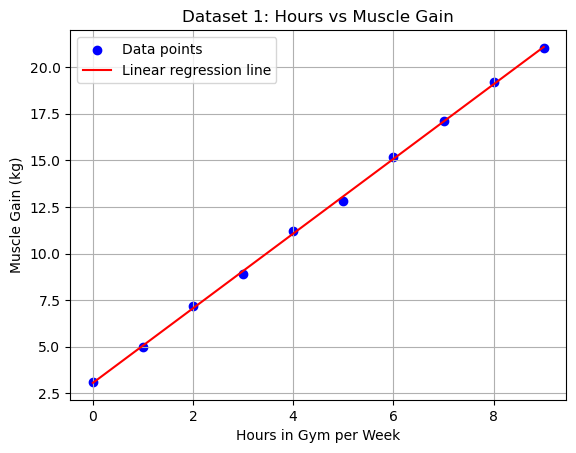

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x1 = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y1 = np.array([3.1,5.0,7.2,8.9,11.2,12.8,15.2,17.1,19.2,21.0])

model = LinearRegression()
model.fit(x1,y1)

print(f'Slope (m): {model.coef_[0]:.2f}')
print(f"Intercept (b): {model.intercept_:.2f}") 

y_pred = model.predict(x1)

predicted = model.predict([[0]]) 
print(f'Predicted muscle mass gain : {predicted[0]:.2f} hours spent in the gym per week')

mse = mean_squared_error(y1, y_pred)
mae = mean_absolute_error(y1, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


plt.scatter(x1, y1, color="blue", label="Data points")
plt.plot(x1, y_pred, color="red", label="Linear regression line")
plt.title("Dataset 1: Hours vs Muscle Gain")
plt.xlabel("Hours in Gym per Week")
plt.ylabel("Muscle Gain (kg)")
plt.legend()
plt.grid(True)
plt.show()

Intercept (β₀): 4.30
Coefficient for x (β₁): 1.85
Coefficient for x² (β₂): -0.66
Polynomial equation: y = 4.30 + (1.85)x + (-0.66)x²
Optimal daily weightlifting load in kg : 1.40
Predicted minimum muscle strength score: 5.59 seconds

Training:
Training MAE: 0.59
Training RMSE: 0.79
Training MSE:0.62
Training R²:0.99
Testing:
Testing MAE: 2.20
Testing RMSE: 2.47
Testing MSE: 6.09
Tasting R²:0.95

Adjusted R² Train: 0.98
Adjusted R² Test: nan


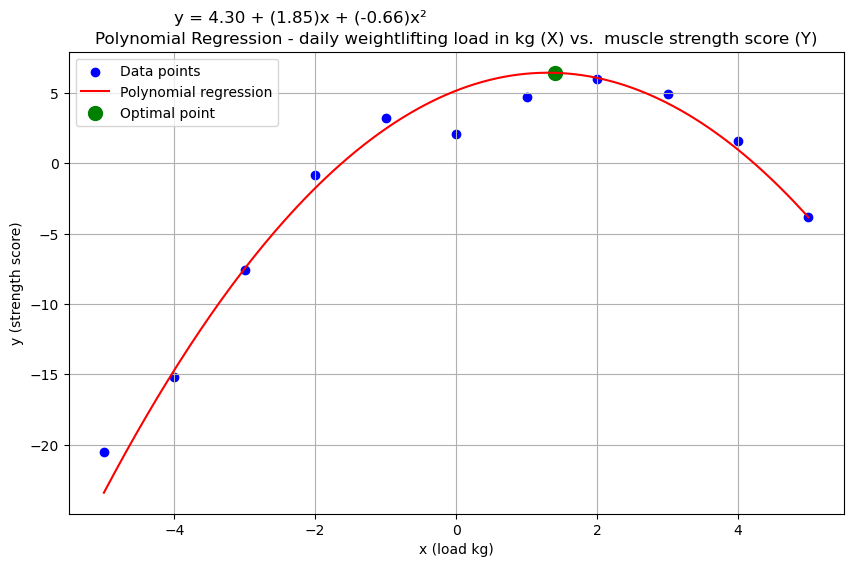

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

x2=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5]).reshape(-1, 1)
y2 = np.array([-20.5,-15.2,-7.6,-0.8,3.2,2.1,4.7,6.0,4.9,1.6,-3.8])

# Create polynomial regression model (degree 2) 
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
# Fit the model
polynomial_model.fit(x2, y2)

# Get the coefficients
coefficients = polynomial_model.named_steps['linear'].coef_
intercept = polynomial_model.named_steps['linear'].intercept_

print(f"Intercept (β₀): {intercept:.2f}")
print(f"Coefficient for x (β₁): {coefficients[1]:.2f}")
print(f"Coefficient for x² (β₂): {coefficients[2]:.2f}")

# Equation
equation = f"y = {intercept:.2f} + ({coefficients[1]:.2f})x + ({coefficients[2]:.2f})x²"
print(f"Polynomial equation: {equation}")

# Find optimal 
optimal = -coefficients[1] / (2 * coefficients[2])
print(f"Optimal daily weightlifting load in kg : {optimal:.2f}")
print(f"Predicted minimum muscle strength score: {polynomial_model.predict([[optimal]])[0]:.2f} seconds")
print()
#Train and Test
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
polynomial_model.fit(X_train, y_train)
y_pred_train = polynomial_model.predict(X_train)
y_pred_test  = polynomial_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_mse = mean_squared_error(y_train , y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2= r2_score(y_train,y_pred_train)
test_r2 = r2_score(y_test,y_pred_test)
print("Training:")
print(f"Training MAE: {train_mae:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training MSE:{train_mse:.2f}")
print(f"Training R²:{train_r2:.2f}")
print("Testing:")
print(f"Testing MAE: {test_mae:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Tasting R²:{test_r2:.2f}")
print()
#Adjusted R²
n_train = len(X_train)
p = 2
adj_r2_train = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)

n_test = len(X_test)
if n_test > p + 1:
    adj_r2_test = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)
else:
    adj_r2_test = np.nan 

print(f"Adjusted R² Train: {adj_r2_train:.2f}")
print(f"Adjusted R² Test: {adj_r2_test:.2f}")
# Create smooth curve for plotting
x_curve =np.linspace(-5, 5, 200).reshape(-1, 1)
y_curve = polynomial_model.predict(x_curve)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x2, y2, color='blue', label='Data points')
plt.plot(x_curve, y_curve, color='red', label='Polynomial regression')
plt.scatter([[optimal]], [polynomial_model.predict([[optimal]])], 
            color='green', s=100, label='Optimal point')

# Add labels
plt.title('Polynomial Regression - daily weightlifting load in kg (X) vs.  muscle strength score (Y)')
plt.xlabel('x (load kg)')
plt.ylabel('y (strength score)')
plt.grid(True)
plt.legend()

# Display equation on the graph
plt.text(-4, 10, equation, fontsize=12)

plt.show()


=== Degree 1 ===
Training MAE: 5.02, MSE: 31.83, RMSE: 5.64, R²: 0.34, Adj R²: 0.08
Testing  MAE: 6.12, MSE: 56.76, RMSE: 7.53, R²: 0.49, Adj R²: nan


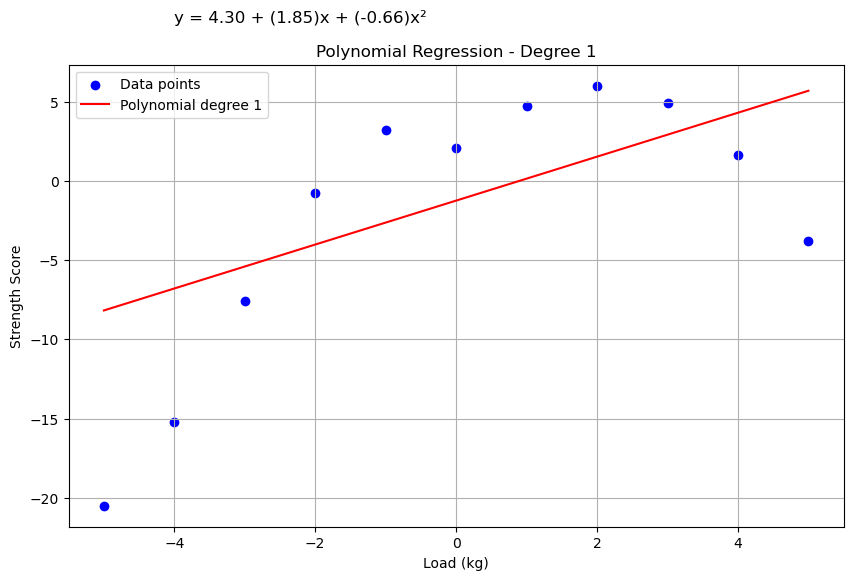


=== Degree 2 ===
Training MAE: 0.59, MSE: 0.62, RMSE: 0.79, R²: 0.99, Adj R²: 0.98
Testing  MAE: 2.20, MSE: 6.09, RMSE: 2.47, R²: 0.95, Adj R²: nan
Polynomial equation: y = 5.16 + (1.96)x^1 + (-0.75)x^2
Optimal x: 1.30, Optimal y: 0.56


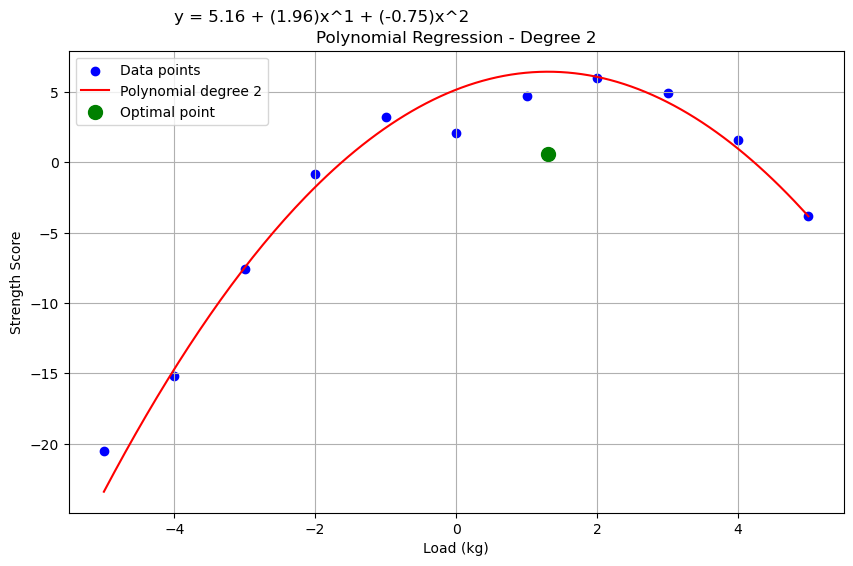


=== Degree 3 ===
Training MAE: 0.56, MSE: 0.52, RMSE: 0.72, R²: 0.99, Adj R²: 0.97
Testing  MAE: 2.78, MSE: 9.88, RMSE: 3.14, R²: 0.91, Adj R²: nan
Polynomial equation: y = 5.31 + (1.73)x^1 + (-0.78)x^2 + (0.02)x^3


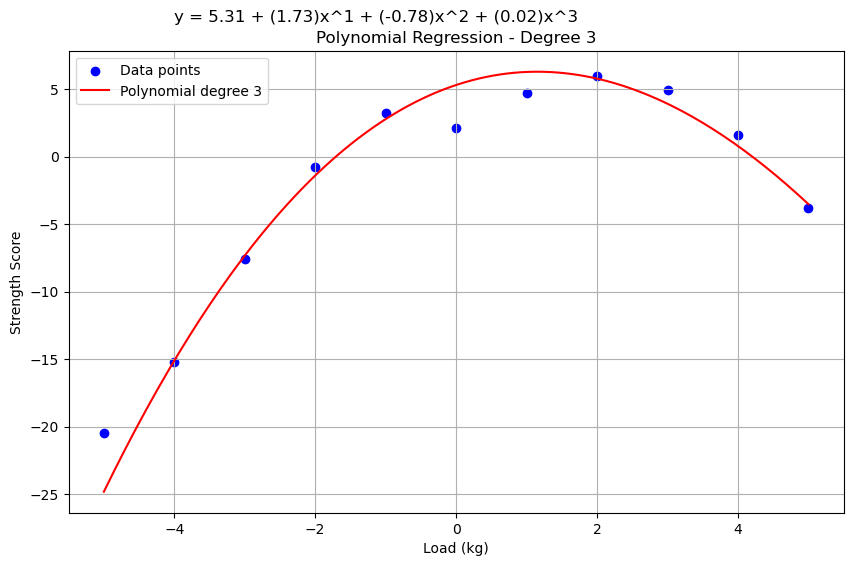


=== Degree 4 ===
Training MAE: 0.47, MSE: 0.31, RMSE: 0.56, R²: 0.99, Adj R²: 0.98
Testing  MAE: 3.62, MSE: 24.53, RMSE: 4.95, R²: 0.78, Adj R²: nan
Polynomial equation: y = 4.57 + (1.56)x^1 + (-0.51)x^2 + (0.04)x^3 + (-0.01)x^4


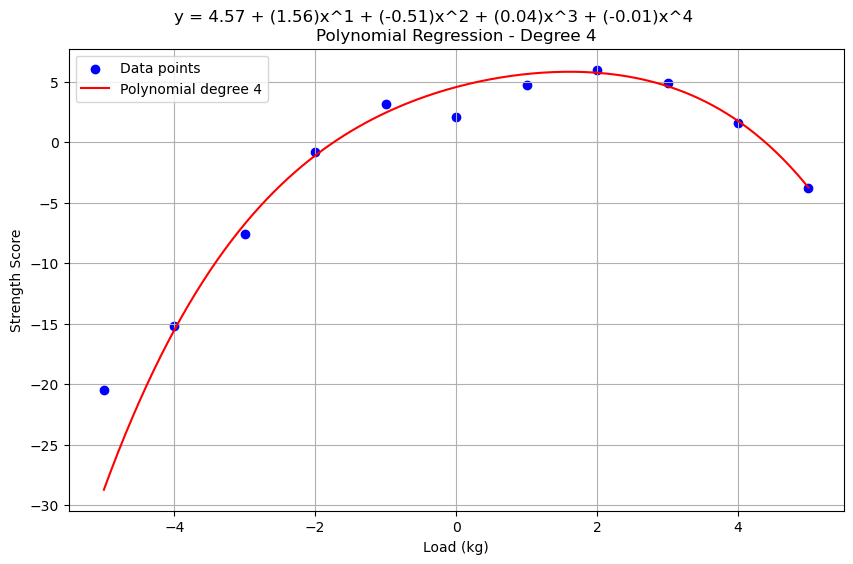

In [93]:
#Bonus
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x2 = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5]).reshape(-1,1)
y2 = np.array([-20.5,-15.2,-7.6,-0.8,3.2,2.1,4.7,6.0,4.9,1.6,-3.8])

degrees = [1, 2, 3, 4]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

for d in degrees:
    # Polynomial regression pipeline
    polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=d)),
    ('linear', LinearRegression())
    ])
     # Fit model
    polynomial_model.fit(X_train, y_train)
    # Predictions
    y_pred_train = polynomial_model.predict(X_train)
    y_pred_test  = polynomial_model.predict(X_test)
    # Metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    train_mse = mean_squared_error(y_train , y_pred_train)
    test_mse = mean_squared_error(y_test,y_pred_test)
    
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    train_r2= r2_score(y_train,y_pred_train)
    test_r2 = r2_score(y_test,y_pred_test)
    
     # Adjusted R²
    n_train = X_train.shape[0]
    p = len(polynomial_model.named_steps['linear'].coef_)  
    adj_r2_train = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
    if n_test > p + 1:
        adj_r2_test  = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)
    else:
        adj_r2_test = np.nan

    print(f"\n=== Degree {d} ===")
    print(f"Training MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}, Adj R²: {adj_r2_train:.2f}")
    print(f"Testing  MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}, Adj R²: {adj_r2_test:.2f}")
    # Equation for degrees >= 2
    if d >= 2:
        coefficients = polynomial_model.named_steps['linear'].coef_
        intercept = polynomial_model.named_steps['linear'].intercept_
        equation = f"y = {intercept:.2f} " + " ".join([f"+ ({coefficients[i]:.2f})x^{i}" for i in range(1,len(coefficients))])
        print(f"Polynomial equation: {equation}")
        
         # Optimal point (vertex) for quadratic only
        if d == 2:
            optimal_x = -coefficients[1] / (2 * coefficients[2])
            optimal_y = model.predict([[optimal_x]])[0]
            print(f"Optimal x: {optimal_x:.2f}, Optimal y: {optimal_y:.2f}")
    
        
    x_curve =np.linspace(min(x2),max(x2),200).reshape(-1, 1)
    y_curve = polynomial_model.predict(x_curve)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x2, y2, color='blue', label='Data points')
    plt.plot(x_curve, y_curve, color='red', label=f'Polynomial degree {d}')
    if d == 2:
        plt.scatter([optimal_x], [optimal_y], color='green', s=100, label='Optimal point')

    plt.title(f'Polynomial Regression - Degree {d}')
    plt.xlabel('Load (kg)')
    plt.ylabel('Strength Score')
    plt.grid(True)
    plt.legend()
    plt.text(-4, 10, equation, fontsize=12)
    plt.show()